In [24]:
#Lecture 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
#import csv data from collab
x=pd.read_csv('/content/NVDA (2).csv',header=0)
#create datetimeindex
dates = pd.date_range(start='2022-05-26', periods = len(x), freq='W')
x.index = dates
x

,Date,Open,High,Low,Close,Adj Close,Volume
2022-05-29,2022-05-30,189.800003,196.190002,181.220001,187.199997,187.025208,245604900
2022-06-05,2022-06-06,191.389999,193.369995,168.690002,169.740005,169.581512,203539400
2022-06-12,2022-06-13,160.000000,168.679993,153.279999,158.800003,158.685272,281385200
2022-06-19,2022-06-20,164.750000,171.399994,158.529999,171.259995,171.136261,185605700
2022-06-26,2022-06-27,173.119995,173.300003,143.919998,145.229996,145.125076,263514900
2022-07-03,2022-07-04,141.750000,160.369995,140.550003,158.380005,158.265579,214133800
2022-07-10,2022-07-11,155.259995,157.820007,144.649994,157.619995,157.506119,225989200
2022-07-17,2022-07-18,163.020004,181.440002,160.020004,173.190002,173.064880,322714100
2022-07-24,2022-07-25,170.190002,182.440002,164.779999,181.630005,181.498779,235849500
2022-07-31,2022-08-01,181.820007,192.740005,179.899994,189.889999,189.752808,217986200


In [25]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(x['Adj Close'])

# Print the test statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.733634
p-value: 0.998208


In [26]:
# Perform the KPSS test
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
result = kpss(x['Adj Close'], regression='c')

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print('KPSS test statistic:', test_statistic)
print('p-value:', p_value)

# Interpret the result
if p_value < 0.05:
    print('Reject the null hypothesis: the time series is non-stationary.')
else:
    print('Fail to reject the null hypothesis: the time series is stationary.')

KPSS test statistic: 0.8225066240580621
p-value: 0.01
Reject the null hypothesis: the time series is non-stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


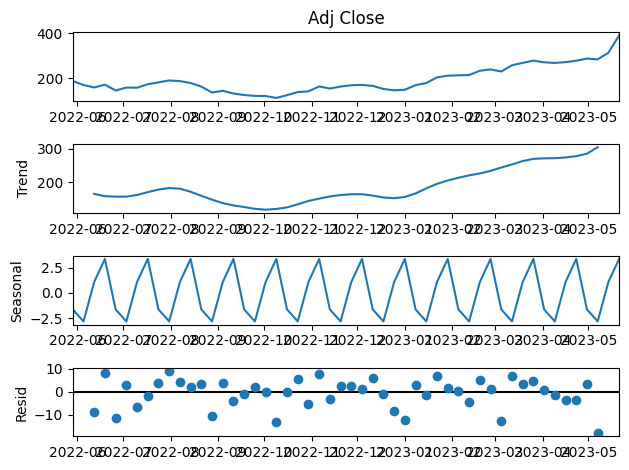

In [22]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(x['Adj Close'], model='additive', period= 4)

# Plot the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition.plot()
plt.show()

In [27]:
# Create the MA model
model_ma = sm.tsa.arima.ARIMA(x['Adj Close'], order=(0,0,1))

# Fit the model
results_ma = model_ma.fit()

# Print the summary of the model
print(results_ma.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   52
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -258.417
Date:                Wed, 07 Jun 2023   AIC                            522.835
Time:                        12:45:23   BIC                            528.688
Sample:                    05-29-2022   HQIC                           525.079
                         - 05-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.1746     12.100     16.047      0.000     170.458     217.891
ma.L1          0.9968      2.124      0.469      0.639      -3.166       5.160
sigma2      1127.4392   2221.780      0.507      0.6

In [28]:
model_ar = sm.tsa.arima.ARIMA(x['Adj Close'], order=(1,0, 0))

# Fit the model
results_ar = model_ar.fit()

# Print the summary of the model
print(results_ar.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   52
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -221.492
Date:                Wed, 07 Jun 2023   AIC                            448.983
Time:                        12:45:26   BIC                            454.837
Sample:                    05-29-2022   HQIC                           451.227
                         - 05-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.2584    112.249      2.336      0.019      42.254     482.263
ar.L1          0.9860      0.031     31.329      0.000       0.924       1.048
sigma2       273.7267     29.799      9.186      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [29]:
# Create the ARMA model
model_arma = sm.tsa.arima.ARIMA(x['Adj Close'], order=(1,0,1))

# Fit the model
results_arma = model_arma.fit()

# Print the summary of the model
print(results_arma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   52
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -219.982
Date:                Wed, 07 Jun 2023   AIC                            447.963
Time:                        12:45:30   BIC                            455.768
Sample:                    05-29-2022   HQIC                           450.955
                         - 05-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.1232    114.077      2.307      0.021      39.536     486.710
ar.L1          0.9809      0.038     26.156      0.000       0.907       1.054
ma.L1          0.2585      0.167      1.552      0.1

In [30]:
# Create the ARIMA model
model_arima = sm.tsa.arima.ARIMA(x['Adj Close'], order=(1,1,1))

# Fit the model
results_arima = model_arima.fit()

# Print the summary of the model
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -212.816
Date:                Wed, 07 Jun 2023   AIC                            431.631
Time:                        12:45:33   BIC                            437.426
Sample:                    05-29-2022   HQIC                           433.846
                         - 05-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7590      0.381      1.992      0.046       0.012       1.506
ma.L1         -0.4078      0.400     -1.019      0.308      -1.192       0.377
sigma2       245.1584     41.349      5.929      0.0

In [31]:
# Print the AIC, BIC, and HQIC values for each model
print('Model 1: AIC={}, BIC={}, HQIC={}'.format(results_ma.aic, results_ma.bic, results_ma.hqic))
print('Model 2: AIC={}, BIC={}, HQIC={}'.format(results_ar.aic, results_ar.bic, results_ar.hqic))
print('Model 3: AIC={}, BIC={}, HQIC={}'.format(results_arma.aic, results_arma.bic, results_arma.hqic))
print('Model 4: AIC={}, BIC={}, HQIC={}'.format(results_arima.aic, results_arima.bic, results_arima.hqic))

Model 1: AIC=522.8345816693585, BIC=528.6883128251028, HQIC=525.0787640382603
Model 2: AIC=448.98310102863815, BIC=454.83683218438244, HQIC=451.2272833975399
Model 3: AIC=447.9632087633896, BIC=455.7681836377153, HQIC=450.95545192192526
Model 4: AIC=431.6310136377676, BIC=437.42649053594056, HQIC=433.84563677140284


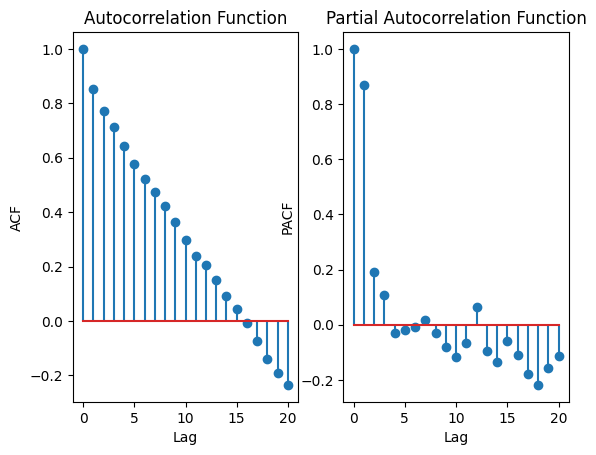

In [32]:
acf_1 = sm.tsa.stattools.acf(x['Adj Close'].values, nlags=20)
pacf_1 = sm.tsa.stattools.pacf(x['Adj Close'].values, nlags=20)

# Plot the ACF
plt.subplot(121)
plt.stem(acf_1)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# Plot the PACF
plt.subplot(122)
plt.stem(pacf_1)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

# Display the plots
plt.show()

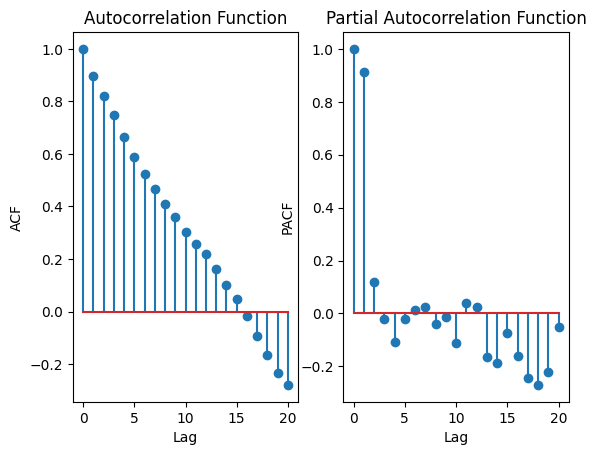

In [33]:
logP = np.log(x['Adj Close'])
logP
# Calculate the ACF and PACF
acf_2 = sm.tsa.stattools.acf(logP, nlags=20)
pacf_2 = sm.tsa.stattools.pacf(logP, nlags=20)

# Plot the ACF
plt.subplot(121)
plt.stem(acf_2)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# Plot the PACF
plt.subplot(122)
plt.stem(pacf_2)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

# Display the plots
plt.show()

In [34]:
# Create the ARIMA model
model_arima2 = sm.tsa.arima.ARIMA(logP, order=(1,1,1))

# Fit the model
results_arima2 = model_arima2.fit()

# Print the summary of the model
print(results_arima2.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  58.840
Date:                Wed, 07 Jun 2023   AIC                           -111.679
Time:                        12:45:47   BIC                           -105.884
Sample:                    05-29-2022   HQIC                          -109.465
                         - 05-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6770      0.450      1.505      0.132      -0.205       1.559
ma.L1         -0.4791      0.492     -0.973      0.331      -1.444       0.486
sigma2         0.0058      0.001      4.826      0.0

In [35]:
#Create new dataframe DlogGDP, which contains first difference of logGDP
DlogP = logP.diff()
DlogP

2022-05-29         NaN
2022-06-05   -0.097910
2022-06-12   -0.066411
2022-06-19    0.075537
2022-06-26   -0.164864
2022-07-03    0.086679
2022-07-10   -0.004810
2022-07-17    0.094202
2022-07-24    0.047582
2022-07-31    0.044473
2022-08-07   -0.014855
2022-08-14   -0.047057
2022-08-21   -0.093239
2022-08-28   -0.175188
2022-09-04    0.052805
2022-09-11   -0.085963
2022-09-18   -0.053057
2022-09-25   -0.030584
2022-10-02   -0.005203
2022-10-09   -0.072899
2022-10-16    0.104683
2022-10-23    0.104124
2022-10-30    0.023009
2022-11-06    0.142682
2022-11-13   -0.057868
2022-11-20    0.054371
2022-11-27    0.036569
2022-12-04    0.007636
2022-12-11   -0.025618
2022-12-18   -0.085964
2022-12-25   -0.039710
2023-01-01    0.016626
2023-01-08    0.128649
2023-01-15    0.054133
2023-01-22    0.132431
2023-01-29    0.035455
2023-02-05    0.007789
2023-02-12    0.005768
2023-02-19    0.085022
2023-02-26    0.025608
2023-03-05   -0.039489
2023-03-12    0.113662
2023-03-19    0.040155
2023-03-26 

<Axes: >

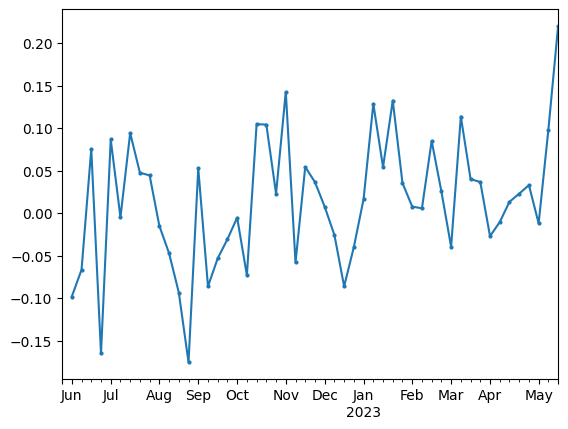

In [36]:
DlogP.plot(marker = 'o', ms = 2)

In [37]:
# Perform the KPSS test
result = kpss(DlogP.dropna(), regression='c')

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print('KPSS test statistic:', test_statistic)
print('p-value:', p_value)

# Interpret the result
if p_value < 0.05:
    print('Reject the null hypothesis: the time series is non-stationary.')
else:
    print('Fail to reject the null hypothesis: the time series is stationary.')

KPSS test statistic: 0.43659358013783667
p-value: 0.061382077526794546
Fail to reject the null hypothesis: the time series is stationary.


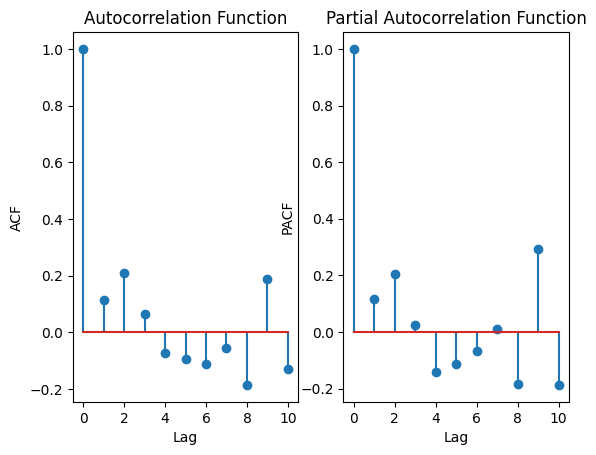

In [38]:
# title Default title text
# Calculate the ACF and PACF
acf_3 = sm.tsa.stattools.acf(DlogP.dropna(), nlags=10)
pacf_3 = sm.tsa.stattools.pacf(DlogP.dropna(), nlags=10)



# Plot the ACF
plt.subplot(121)
plt.locator_params(axis='x', nbins=10)
plt.stem(acf_3)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# Plot the PACF
plt.subplot(122)
plt.locator_params(axis='x', nbins=10)
plt.stem(pacf_3)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

# Display the plots
  plt.show()

In [43]:
inf = sm.tsa.arma_order_select_ic(DlogP, max_ar = 4,
								max_ma = 4, ic = ['aic', 'bic', 'hqic'], trend = 'c')
print(inf.aic_min_order)
print(inf.bic_min_order)
print(inf.hqic_min_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

(3, 1)
(0, 0)
(0, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
# Create the ARIMA model
model_arima3 = sm.tsa.arima.ARIMA(DlogP, order=(0,0,0))

# Fit the model
results_arima3 = model_arima3.fit()

# Print the summary of the model
print(results_arima3.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   52
Model:                          ARIMA   Log Likelihood                  58.366
Date:                Wed, 07 Jun 2023   AIC                           -112.731
Time:                        12:50:33   BIC                           -108.829
Sample:                    05-29-2022   HQIC                          -111.235
                         - 05-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0144      0.011      1.332      0.183      -0.007       0.036
sigma2         0.0059      0.001      5.339      0.000       0.004       0.008
Ljung-Box (L1) (Q):                   0.71   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2023-04-30    0.0
2023-05-07    0.0
2023-05-14    0.0
2023-05-21    0.0
2023-05-28    0.0
2023-06-04    0.0
2023-06-11    0.0
2023-06-18    0.0
2023-06-25    0.0
2023-07-02    0.0
2023-07-09    0.0
2023-07-16    0.0
Freq: W-SUN, Name: predicted_mean, dtype: float64
2023-04-30    0.033000
2023-05-07   -0.011926
2023-05-14    0.098193
2023-05-21    0.219709
Freq: W-SUN, Name: Adj Close, dtype: float64


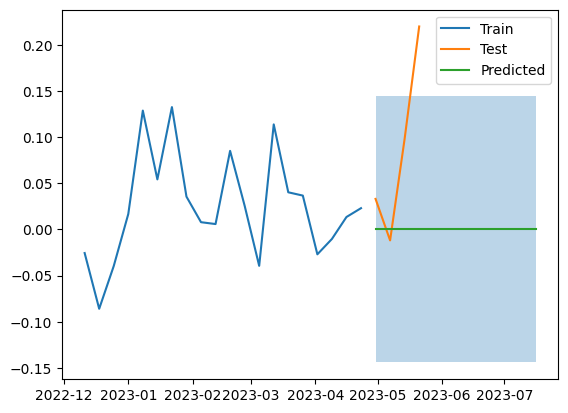

In [44]:
#The variable train_data is assigned the values of the DlogGDP time series up to the fourth-to-last observation. This will be used to train an ARIMA model.
train_data = DlogP[:-4]
#The variable test_data is assigned the values of the last four observations of the DlogGDP time series. This will be used to test the ARIMA model's forecast accuracy.
test_data = DlogP[-4:]
#An ARIMA(5,0,0) model is defined using the SARIMAX() function from the statsmodels library, with train_data as the input and the (5,0,0) order specification for the ARIMA model. This model is then fitted to the training data using the fit() method of the ARIMAResults class.
model_arima4 = sm.tsa.SARIMAX(train_data, order=(0, 0, 0))
results_arima4 = model_arima4.fit()
#The forecast() method of the ARIMAResults class is used to generate a 12-step ahead forecast of the DlogGDP time series. This forecast is stored in the variable forecast_arima4.
forecast_arima4 = results_arima4.forecast(steps=12)
#The forecast_arima4 and test_data variables are printed to the console to compare the predicted values with the actual values.
print(forecast_arima4)
print(test_data)
#The conf_int() method of the ARIMAResults class is used to compute the 95% confidence interval for the 12-step ahead forecast. This interval is stored in the variable forecast_ci.
forecast_ci = results_arima4.get_forecast(steps=12).conf_int()

#The code then generates a plot of the actual test data and the predicted values of the DlogGDP 
#time series using the plot() function from the matplotlib library. 
#The predicted values are plotted as a solid line, while the upper and lower bounds of the 
#confidence interval are plotted as a shaded region using the fill_between() function.
plt.plot(train_data[-20:].index, train_data[-20:].values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(forecast_arima4.index,forecast_arima4.values, label='Predicted')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.3)
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  56.172
Date:                Wed, 07 Jun 2023   AIC                           -108.344
Time:                        12:56:50   BIC                           -104.601
Sample:                    05-29-2022   HQIC                          -106.930
                         - 04-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0910      0.143      0.637      0.524      -0.189       0.371
sigma2         0.0054      0.001      4.475      0.000       0.003       0.008
Ljung-Box (L1) (Q):                   0.07   Jarque-

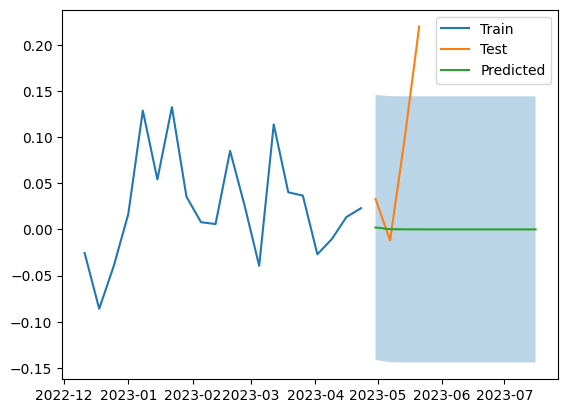

In [45]:
model_arima5 = sm.tsa.SARIMAX(train_data, order=(1, 0, 0))
results_arima5 = model_arima5.fit()
print(results_arima5.summary())
#The forecast() method of the ARIMAResults class is used to generate a 12-step ahead forecast of the DlogGDP time series. This forecast is stored in the variable forecast_arima4.
forecast_arima5 = results_arima5.forecast(steps=12)
#The forecast_arima4 and test_data variables are printed to the console to compare the predicted values with the actual values.
print(forecast_arima5)
print(test_data)
#The conf_int() method of the ARIMAResults class is used to compute the 95% confidence interval for the 12-step ahead forecast. This interval is stored in the variable forecast_ci.
forecast_ci = results_arima5.get_forecast(steps=12).conf_int()

#The code then generates a plot of the actual test data and the predicted values of the DlogGDP 
#time series using the plot() function from the matplotlib library. 
#The predicted values are plotted as a solid line, while the upper and lower bounds of the 
#confidence interval are plotted as a shaded region using the fill_between() function.
plt.plot(train_data[-20:].index, train_data[-20:].values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(forecast_arima5.index,forecast_arima5.values, label='Predicted')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.3)
plt.legend()
plt.show()

In [46]:
print('Model 4 AIC: ', results_arima4.aic)
print('Model 4 BIC: ', results_arima4.bic)
print('Model 4 HQIC: ', results_arima4.hqic)
print('Model 5 AIC: ', results_arima5.aic)
print('Model 5 BIC: ', results_arima5.bic)
print('Model 5 HQIC: ', results_arima5.hqic)

Model 4 AIC:  -109.96060164717619
Model 4 BIC:  -108.0894006362683
Model 4 HQIC:  -109.25347205191125
Model 5 AIC:  -108.34376142884614
Model 5 BIC:  -104.60135940703036
Model 5 HQIC:  -106.92950223831623


In [47]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.9 MB/s eta 0:00:00


In [48]:
#Import pmarima API
import pmdarima as pm
train_data=DlogP
#use auto_arima in order to define number of lags;
#trace - track for status of fits; ignor errors; seasonality presented
model = pm.arima.auto_arima(train_data.dropna(), 
                            trace=True, 
                            error_action='ignore', 
                            seasonal=True, 
                            w=4,
                            suppress_warnings=True,
                            max_p=7,
                            max_q=7,
                            information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=-97.747, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=-108.867, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=-105.730, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=-105.468, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-111.052, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=-102.869, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.664 seconds


In [ ]:
model_arima6 = sm.tsa.SARIMAX(train_data, order=(0, 0, 0), seasonal_order=(0,0,0,0) )
results_arima6 = model_arima6.fit()
print(results_arima6.summary())

In [ ]:
print('Model 4 AIC: ', results_arima4.aic)
print('Model 4 BIC: ', results_arima4.bic)
print('Model 4 HQIC: ', results_arima4.hqic)
print('Model 5 AIC: ', results_arima5.aic)
print('Model 5 BIC: ', results_arima5.bic)
print('Model 5 HQIC: ', results_arima5.hqic)
print('Model 6 AIC: ', results_arima6.aic)
print('Model 6 BIC: ', results_arima6.bic)
print('Model 6 HQIC: ', results_arima6.hqic)